In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
import pandas as pd
data = pd.read_csv('/home/atharva/tem2/dataset_temp.csv')
data

,company_repName,company_name,designation,country,exhibitor,role,pro_category,updatedAt,is_confirmed,profile_completion,city,state,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentForm,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,date,time,year,month,day
0,SHANTANU KHANNA,"ISO 9001:2015 , ISI, IBR, MSME, NSIC",Director Technical,India,exhibitor,exhibitor,Ancillaries,2021-12-22 08:53:21,0,0,Jalandhar,Punjab,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,5,15,valvcointernational.com,2021-12-22,0 days 08:53:21,2021,12,22
1,VIVEK JAIN,THE BOILER COMPONENTS MFG.CO.,director,India,exhibitor,exhibitor,Boilercomponentmanufacturer,2021-12-22 09:25:02,0,0,North West Delhi,DELHI,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,3,49,yahoo.com,2021-12-22,0 days 09:25:02,2021,12,22
2,Mandar Bhopale,Emcure pharmaceutical,Boiler attendent,India,exhibitor,exhibitor,Boilermanufacturer,2021-12-22 10:32:25,0,0,Kolhapur,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,2,39,gmail.com,2021-12-22,0 days 10:32:25,2021,12,22
3,Sachin sarjerao kamble,Shri gurudutt sugar Ltd,Boiler attender,India,exhibitor,exhibitor,Technology&serviceprovider,2021-12-22 11:05:33,0,0,Kolhapur,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,2,39,gmail.com,2021-12-22,0 days 11:05:33,2021,12,22
4,Mallikarjun Menkudale,Alfa Boiler Pvt. Ltd.,Site Engineer,India,exhibitor,exhibitor,Technology&serviceprovider,2022-09-12 04:22:12,1,0,Nagpur,MAHARASHTRA,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,5,11,gmail.com,2022-09-12,0 days 04:22:12,2022,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Priyadarshini,Total Shipping & Logistics Pvt Ltd,Sales Manager,India,exhibitor,exhibitor,Boilermanufacturer,2022-09-19 15:46:00,1,0,Mumbai,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,5,36,totalgroup.in,2022-09-19,0 days 15:46:00,2022,9,19
460,Rahul Jain,Manisha steel,Export and Domestic Sales Head,India,exhibitor,exhibitor,Boilercomponentmanufacturer,2022-10-13 11:37:11,1,0,Mumbai,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,3,90,gmail.com,2022-10-13,0 days 11:37:11,2022,10,13
461,Prakash Thanth,Performance Engineering,Owner,India,exhibitor,exhibitor,Boilermanufacturer,2022-11-03 11:41:50,1,0,Ankleshwar,Gujarat,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,3,61,gmail.com,2022-11-03,0 days 11:41:50,2022,11,3
462,Pragnesh Patel,Energy Process Equipments,Director,India,exhibitor,exhibitor,Boilermanufacturer,2022-10-08 18:33:26,0,0,Vadodara,Gujarat,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,5,83,energy-boilers.com,2022-10-08,0 days 18:33:26,2022,10,8


## Retrieving Extra Features by using SERPAPI and LLM

In [3]:
import os
import requests

SERPAPI_API_KEY = ''

def get_company_valuation(company_name):
    api_key = os.getenv("SERPAPI_API_KEY", SERPAPI_API_KEY)  
    params = {
        "q": f"{company_name} valuation",
        "api_key": api_key,
        "hl": "en",
        "gl": "us",
        "engine": "google"
    }

    response = requests.get("https://serpapi.com/search", params=params)

    if response.status_code == 200:
        print(response)
        data = response.json()
        print(data)
        knowledge_graph = data.get('knowledge_graph', {})
        estimated_valuation = knowledge_graph.get('estimated_valuation')
        if estimated_valuation:
            return estimated_valuation
    return "Valuation not found"

company_name = 'TCS'

# valuation = get_company_valuation(company_name) 
# print(f"The valuation of {company_name} is {valuation}")
# print('done')

<Response [200]>
{'search_metadata': {'id': '662cf11194fb0316f35a0e44', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/6f3949961124807f/662cf11194fb0316f35a0e44.json', 'created_at': '2024-04-27 12:35:29 UTC', 'processed_at': '2024-04-27 12:35:29 UTC', 'google_url': 'https://www.google.com/search?q=TCS+valuation&oq=TCS+valuation&hl=en&gl=us&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/6f3949961124807f/662cf11194fb0316f35a0e44.html', 'total_time_taken': 0.89}, 'search_parameters': {'engine': 'google', 'q': 'TCS valuation', 'google_domain': 'google.com', 'hl': 'en', 'gl': 'us', 'device': 'desktop'}, 'search_information': {'query_displayed': 'TCS valuation', 'total_results': 101000000, 'time_taken_displayed': 0.52, 'organic_results_state': 'Results for exact spelling'}, 'jobs_results': {'location': 'News'}, 'knowledge_graph': {'title': 'Tata Consultancy Services Ltd', 'type': 'NSE: TCS', 'entity_type': 'finance, finance', 'main_tab_text': '

In [ ]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.llms import OpenAI

llm = OpenAI(temperature=0)

tools = load_tools(["serpapi", "llm-math"], llm=llm)

agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

agent.run("what is company valuation")



In [16]:
def total_funding(company):
    return agent.run('What is the {} total funding?'.format(company))

def latest_funding(company):
    return agent.run('What is the {} latest funding'.format(company))
    

## Removing less useful columns

In [7]:
data = data.drop(['date', 'time','role'] , axis = 1)
data

,company_repName,company_name,designation,country,exhibitor,pro_category,updatedAt,is_confirmed,profile_completion,city,state,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentForm,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,year,month,day,total_valuation,latest_valuation
0,SHANTANU KHANNA,"ISO 9001:2015 , ISI, IBR, MSME, NSIC",Director Technical,India,exhibitor,Ancillaries,2021-12-22 08:53:21,0,0,Jalandhar,Punjab,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,5,15,valvcointernational.com,2021,12,22,24.273605,1.550167
1,VIVEK JAIN,THE BOILER COMPONENTS MFG.CO.,director,India,exhibitor,Boilercomponentmanufacturer,2021-12-22 09:25:02,0,0,North West Delhi,DELHI,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,3,49,yahoo.com,2021,12,22,16.780704,2.999163
2,Mandar Bhopale,Emcure pharmaceutical,Boiler attendent,India,exhibitor,Boilermanufacturer,2021-12-22 10:32:25,0,0,Kolhapur,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,2,39,gmail.com,2021,12,22,22.705457,8.220644
3,Sachin sarjerao kamble,Shri gurudutt sugar Ltd,Boiler attender,India,exhibitor,Technology&serviceprovider,2021-12-22 11:05:33,0,0,Kolhapur,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,2,39,gmail.com,2021,12,22,14.470571,1.919948
4,Mallikarjun Menkudale,Alfa Boiler Pvt. Ltd.,Site Engineer,India,exhibitor,Technology&serviceprovider,2022-09-12 04:22:12,1,0,Nagpur,MAHARASHTRA,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,5,11,gmail.com,2022,9,12,27.852936,6.977454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Priyadarshini,Total Shipping & Logistics Pvt Ltd,Sales Manager,India,exhibitor,Boilermanufacturer,2022-09-19 15:46:00,1,0,Mumbai,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,5,36,totalgroup.in,2022,9,19,18.959934,8.230089
460,Rahul Jain,Manisha steel,Export and Domestic Sales Head,India,exhibitor,Boilercomponentmanufacturer,2022-10-13 11:37:11,1,0,Mumbai,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,3,90,gmail.com,2022,10,13,16.480783,2.382937
461,Prakash Thanth,Performance Engineering,Owner,India,exhibitor,Boilermanufacturer,2022-11-03 11:41:50,1,0,Ankleshwar,Gujarat,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,3,61,gmail.com,2022,11,3,23.103904,2.426894
462,Pragnesh Patel,Energy Process Equipments,Director,India,exhibitor,Boilermanufacturer,2022-10-08 18:33:26,0,0,Vadodara,Gujarat,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,5,83,energy-boilers.com,2022,10,8,28.758622,1.309745


In [8]:
data['designation'].value_counts()

Director                          30
CEO                               11
Manager                           11
Marketing Manager                  9
Partner                            9
                                  ..
DESIGN MANAGER                     1
ASSISTANT MANAGER MARKETING        1
Manager - Marketing                1
Business Development Associate     1
business head                      1
Name: designation, Length: 304, dtype: int64

## Label Encoding

In [9]:
data['country']=data['country'].map(lambda x : 1 if x=='India' else 0)
data['exhibitor']=data['exhibitor'].map(lambda x : 1 if x=='exhibitor' else 0)
data['designation']=data['designation'].map(lambda x : 1 if x in ['Director' , 'CEO' , 'Manager' , 'Marketing Manager'] else 0)
data

,company_repName,company_name,designation,country,exhibitor,pro_category,updatedAt,is_confirmed,profile_completion,city,state,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentForm,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,year,month,day,total_valuation,latest_valuation
0,SHANTANU KHANNA,"ISO 9001:2015 , ISI, IBR, MSME, NSIC",0,1,1,Ancillaries,2021-12-22 08:53:21,0,0,Jalandhar,Punjab,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,5,15,valvcointernational.com,2021,12,22,24.273605,1.550167
1,VIVEK JAIN,THE BOILER COMPONENTS MFG.CO.,0,1,1,Boilercomponentmanufacturer,2021-12-22 09:25:02,0,0,North West Delhi,DELHI,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,3,49,yahoo.com,2021,12,22,16.780704,2.999163
2,Mandar Bhopale,Emcure pharmaceutical,0,1,1,Boilermanufacturer,2021-12-22 10:32:25,0,0,Kolhapur,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,2,39,gmail.com,2021,12,22,22.705457,8.220644
3,Sachin sarjerao kamble,Shri gurudutt sugar Ltd,0,1,1,Technology&serviceprovider,2021-12-22 11:05:33,0,0,Kolhapur,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,2,39,gmail.com,2021,12,22,14.470571,1.919948
4,Mallikarjun Menkudale,Alfa Boiler Pvt. Ltd.,0,1,1,Technology&serviceprovider,2022-09-12 04:22:12,1,0,Nagpur,MAHARASHTRA,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,5,11,gmail.com,2022,9,12,27.852936,6.977454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Priyadarshini,Total Shipping & Logistics Pvt Ltd,0,1,1,Boilermanufacturer,2022-09-19 15:46:00,1,0,Mumbai,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,5,36,totalgroup.in,2022,9,19,18.959934,8.230089
460,Rahul Jain,Manisha steel,0,1,1,Boilercomponentmanufacturer,2022-10-13 11:37:11,1,0,Mumbai,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,3,90,gmail.com,2022,10,13,16.480783,2.382937
461,Prakash Thanth,Performance Engineering,0,1,1,Boilermanufacturer,2022-11-03 11:41:50,1,0,Ankleshwar,Gujarat,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,3,61,gmail.com,2022,11,3,23.103904,2.426894
462,Pragnesh Patel,Energy Process Equipments,1,1,1,Boilermanufacturer,2022-10-08 18:33:26,0,0,Vadodara,Gujarat,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,5,83,energy-boilers.com,2022,10,8,28.758622,1.309745


In [11]:
ohe_data = pd.get_dummies(data.pro_category)
data2 = pd.concat([data , ohe_data] , axis=1)
data2 = data2.drop('pro_category' , axis=1)
data = data2

In [37]:
data

,company_repName,company_name,designation,country,exhibitor,updatedAt,is_confirmed,profile_completion,city,state,...,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer"
0,SHANTANU KHANNA,"ISO 9001:2015 , ISI, IBR, MSME, NSIC",0,1,1,2021-12-22 08:53:21,0,0,Jalandhar,Punjab,...,14.49,25.51,1,0,0,0,0,0,0,0
1,VIVEK JAIN,THE BOILER COMPONENTS MFG.CO.,0,1,1,2021-12-22 09:25:02,0,0,North West Delhi,DELHI,...,10.81,11.58,0,1,0,0,0,0,0,0
2,Mandar Bhopale,Emcure pharmaceutical,0,1,1,2021-12-22 10:32:25,0,0,Kolhapur,Maharashtra,...,12.30,25.06,0,0,1,0,0,0,0,0
3,Sachin sarjerao kamble,Shri gurudutt sugar Ltd,0,1,1,2021-12-22 11:05:33,0,0,Kolhapur,Maharashtra,...,25.57,25.24,0,0,0,0,0,1,0,0
4,Mallikarjun Menkudale,Alfa Boiler Pvt. Ltd.,0,1,1,2022-09-12 04:22:12,1,0,Nagpur,MAHARASHTRA,...,19.94,12.78,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Priyadarshini,Total Shipping & Logistics Pvt Ltd,0,1,1,2022-09-19 15:46:00,1,0,Mumbai,Maharashtra,...,24.40,21.58,0,0,1,0,0,0,0,0
460,Rahul Jain,Manisha steel,0,1,1,2022-10-13 11:37:11,1,0,Mumbai,Maharashtra,...,10.98,21.64,0,1,0,0,0,0,0,0
461,Prakash Thanth,Performance Engineering,0,1,1,2022-11-03 11:41:50,1,0,Ankleshwar,Gujarat,...,19.88,13.33,0,0,1,0,0,0,0,0
462,Pragnesh Patel,Energy Process Equipments,1,1,1,2022-10-08 18:33:26,0,0,Vadodara,Gujarat,...,12.80,15.16,0,0,1,0,0,0,0,0


In [12]:
data = data.drop(['company_name' , 'company_repName' , 'updatedAt' , 'city'] , axis = 1)
data

,designation,country,exhibitor,is_confirmed,profile_completion,state,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentForm,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,year,month,day,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer"
0,0,1,1,0,0,Punjab,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,5,15,valvcointernational.com,2021,12,22,24.273605,1.550167,1,0,0,0,0,0,0,0
1,0,1,1,0,0,DELHI,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,3,49,yahoo.com,2021,12,22,16.780704,2.999163,0,1,0,0,0,0,0,0
2,0,1,1,0,0,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,2,39,gmail.com,2021,12,22,22.705457,8.220644,0,0,1,0,0,0,0,0
3,0,1,1,0,0,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,2,39,gmail.com,2021,12,22,14.470571,1.919948,0,0,0,0,0,1,0,0
4,0,1,1,1,0,MAHARASHTRA,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,0,5,11,gmail.com,2022,9,12,27.852936,6.977454,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0,1,1,1,0,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,5,36,totalgroup.in,2022,9,19,18.959934,8.230089,0,0,1,0,0,0,0,0
460,0,1,1,1,0,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,3,90,gmail.com,2022,10,13,16.480783,2.382937,0,1,0,0,0,0,0,0
461,0,1,1,1,0,Gujarat,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,3,61,gmail.com,2022,11,3,23.103904,2.426894,0,0,1,0,0,0,0,0
462,1,1,1,0,0,Gujarat,0,0,0,0,0,0,0,0,0,0,0,0,0,USER PROFILE,0,1,1,1,5,83,energy-boilers.com,2022,10,8,28.758622,1.309745,0,0,1,0,0,0,0,0


## Mapping state with the region

In [13]:
state_region_mapping = {
    'andhra pradesh': 'South',
    'arunachal pradesh': 'North',
    'assam': 'North',
    'bihar': 'East',
    'chhattisgarh': 'Middle',
    'goa': 'West',
    'gujarat': 'West',
    'giujarat':'West',
    'gujarat ':'West',
    'haryana': 'North',
    'haryana ':'North',
    'himachal pradesh': 'North',
    'jharkhand': 'East',
    'jharkhand ':'East',
    'karnataka': 'South',
    'kent':'South',
    'kerala': 'South',
    'madhya pradesh': 'Middle',
    'maharashtra': 'West',
    'maharastra':'West',
    'mh':'West',
    'maharashtra ':'West',
    'mahashtra ':'West',
    'maharshtra':'West',
    'manipur': 'North',
    'meghalaya': 'North',
    'mizoram': 'North',
    'nagaland': 'North',
    'odisha': 'East',
    'punjab': 'North',
    'rajasthan': 'North',
    'sikkim': 'East',
    'tamil nadu': 'South',
    'tamilnadu': 'South',
    'tamilnadu ':'South',
    'telangana': 'South',
    'tamil nadi':'South',
    'tripura': 'East',
    'uttar pradesh': 'North',
    'uttar pardesh':'North',
    'uttarakhand': 'North',
    'west bengal': 'East',
    'andaman and nicobar islands': 'East',
    'chandigarh': 'North',
    'dadra and nagar haveli and daman and diu': 'West',
    'dadra and nagar haveli':'West',
    'lakshadweep': 'South',
    'delhi': 'North',
    'puducherry': 'South',
    'other':'West',

}


In [14]:
import numpy as np
data2 = data.copy()  
data2['state'] = data2['state'].map(lambda x: state_region_mapping.get(x.lower(), np.nan))
data2 = data2.dropna()
ohe = pd.get_dummies(data2['state'])
data2 = pd.concat([data2 , ohe] , axis=1)
data2 = data2.drop(['state', 'currentForm'], axis=1)

data2

,designation,country,exhibitor,is_confirmed,profile_completion,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,year,month,day,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer",East,Middle,North,South,West
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,15,valvcointernational.com,2021,12,22,24.273605,1.550167,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3,49,yahoo.com,2021,12,22,16.780704,2.999163,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,39,gmail.com,2021,12,22,22.705457,8.220644,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,39,gmail.com,2021,12,22,14.470571,1.919948,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,11,gmail.com,2022,9,12,27.852936,6.977454,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,36,totalgroup.in,2022,9,19,18.959934,8.230089,0,0,1,0,0,0,0,0,0,0,0,0,1
460,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,90,gmail.com,2022,10,13,16.480783,2.382937,0,1,0,0,0,0,0,0,0,0,0,0,1
461,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,61,gmail.com,2022,11,3,23.103904,2.426894,0,0,1,0,0,0,0,0,0,0,0,0,1
462,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,83,energy-boilers.com,2022,10,8,28.758622,1.309745,0,0,1,0,0,0,0,0,0,0,0,0,1


## Segregating personal and business emails

In [15]:
email_domains = [
    "gmail.com",
    "yahoo.com",
    "outlook.com",
    "hotmail.com",
    "live.com",
    "icloud.com",
    "aol.com",
    "protonmail.com",
    "mail.com",
    "gmx.com",
    "yandex.com",
    "zoho.com"
]
data2['email_domain'] = data2['email_domain'].map(lambda x: 0 if x in email_domains else 1)
data2

,designation,country,exhibitor,is_confirmed,profile_completion,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,year,month,day,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer",East,Middle,North,South,West
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,15,1,2021,12,22,24.273605,1.550167,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3,49,0,2021,12,22,16.780704,2.999163,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,39,0,2021,12,22,22.705457,8.220644,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,39,0,2021,12,22,14.470571,1.919948,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,11,0,2022,9,12,27.852936,6.977454,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,36,1,2022,9,19,18.959934,8.230089,0,0,1,0,0,0,0,0,0,0,0,0,1
460,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,90,0,2022,10,13,16.480783,2.382937,0,1,0,0,0,0,0,0,0,0,0,0,1
461,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,61,0,2022,11,3,23.103904,2.426894,0,0,1,0,0,0,0,0,0,0,0,0,1
462,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,83,1,2022,10,8,28.758622,1.309745,0,0,1,0,0,0,0,0,0,0,0,0,1


# Encoding cyclic features for rotational columns

In [16]:
data3 = data2.copy()
ohe = pd.get_dummies(data2['year'])
data2 = pd.concat([data2 , ohe] , axis=1)
data2 = data2.drop('year' , axis=1)
data2['month'] = (-np.cos(0.52356*data2['month']))
data2['day'] = (-np.cos(0.2095*data2['day']))
data2

,designation,country,exhibitor,is_confirmed,profile_completion,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,month,day,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer",East,Middle,North,South,West,2021,2022
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,15,1,-1.000000,0.103205,24.273605,1.550167,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3,49,0,-1.000000,0.103205,16.780704,2.999163,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,39,0,-1.000000,0.103205,22.705457,8.220644,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,39,0,-1.000000,0.103205,14.470571,1.919948,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,11,0,0.000349,0.809443,27.852936,6.977454,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,36,1,0.000349,0.668276,18.959934,8.230089,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
460,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,90,0,-0.499664,0.913865,16.480783,2.382937,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
461,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,61,0,-0.865812,-0.808910,23.103904,2.426894,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
462,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,83,1,-0.499664,0.105010,28.758622,1.309745,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [17]:
data['email_domain'].value_counts()

gmail.com             123
alfaboilers.co.in      11
yahoo.com               9
thermaxglobal.com       8
s-tgroup.com            7
                     ... 
goodluckindia.com       1
tipl.com                1
sdtork.com              1
sudeengg.com            1
energy-boilers.com      1
Name: email_domain, Length: 262, dtype: int64

<Axes: >

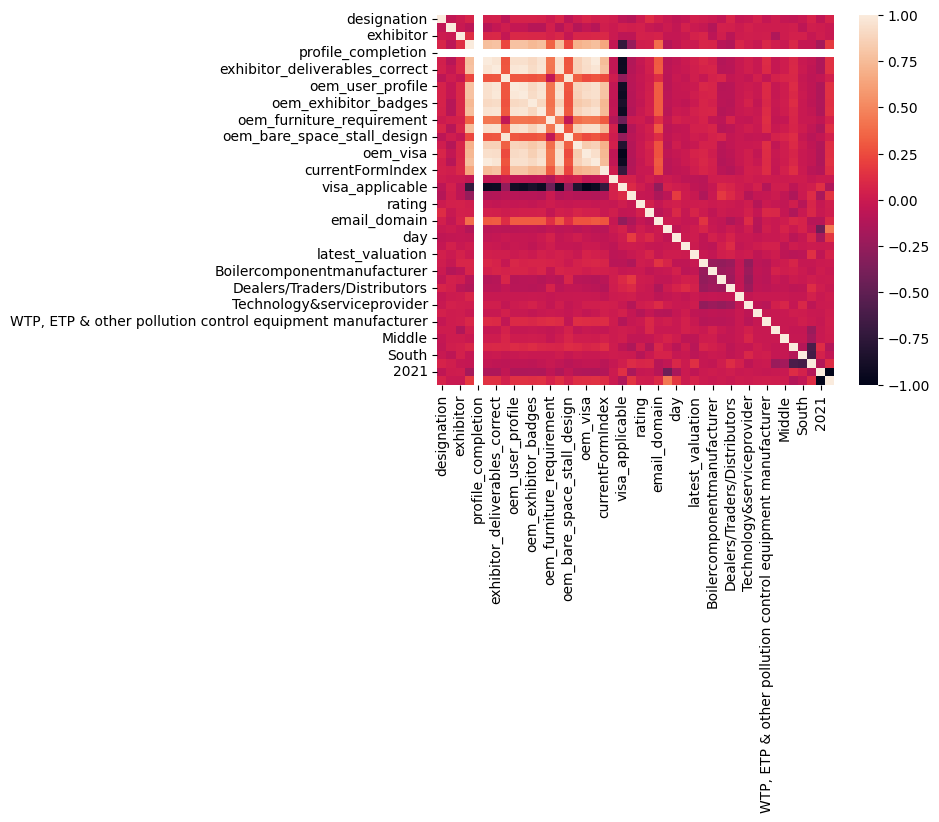

In [18]:
import seaborn as sns 
sns.heatmap(data2.corr() )

In [19]:
data2

,designation,country,exhibitor,is_confirmed,profile_completion,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,month,day,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer",East,Middle,North,South,West,2021,2022
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,15,1,-1.000000,0.103205,24.273605,1.550167,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3,49,0,-1.000000,0.103205,16.780704,2.999163,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,39,0,-1.000000,0.103205,22.705457,8.220644,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,39,0,-1.000000,0.103205,14.470571,1.919948,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,11,0,0.000349,0.809443,27.852936,6.977454,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,36,1,0.000349,0.668276,18.959934,8.230089,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
460,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,90,0,-0.499664,0.913865,16.480783,2.382937,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
461,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,61,0,-0.865812,-0.808910,23.103904,2.426894,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
462,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,83,1,-0.499664,0.105010,28.758622,1.309745,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [21]:
data2.columns

Index([                                              'designation',
                                                         'country',
                                                       'exhibitor',
                                                    'is_confirmed',
                                              'profile_completion',
                                           'indemnity_undertaking',
                                  'exhibitor_deliverables_correct',
                                            'stall_design_correct',
                                                'oem_user_profile',
                                                      'oem_fascia',
                                            'oem_exhibitor_badges',
                                           'oem_power_requirement',
                                       'oem_furniture_requirement',
                                                'oem_host_hostess',
                                     'oem_bare_s

In [22]:
target = data2['ROI']
data2  = data2.drop('ROI', axis =1 )
data2

,designation,country,exhibitor,is_confirmed,profile_completion,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,month,day,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer",East,Middle,North,South,West,2021,2022
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,15,1,-1.000000,0.103205,24.273605,1.550167,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3,49,0,-1.000000,0.103205,16.780704,2.999163,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,39,0,-1.000000,0.103205,22.705457,8.220644,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,39,0,-1.000000,0.103205,14.470571,1.919948,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,11,0,0.000349,0.809443,27.852936,6.977454,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,36,1,0.000349,0.668276,18.959934,8.230089,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
460,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,90,0,-0.499664,0.913865,16.480783,2.382937,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
461,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,61,0,-0.865812,-0.808910,23.103904,2.426894,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
462,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,83,1,-0.499664,0.105010,28.758622,1.309745,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [23]:
selected_columns = [
    'Ancillaries',
    'Boilercomponentmanufacturer',
    'Boilermanufacturer',
    'Dealers/Traders/Distributors',
    'Professionals in NDE, energy audit, RLA and R&M',
    'Technology&serviceprovider',
    'Turbinemanufacturer',
    'WTP, ETP & other pollution control equipment manufacturer',
    'East',
    'Middle',
    'North',
    'South',
    'West',
    2021,
    2022
]

data2[selected_columns] = data2[selected_columns].astype(int)
data2.dtypes

designation                                                    int64
country                                                        int64
exhibitor                                                      int64
is_confirmed                                                   int64
profile_completion                                             int64
indemnity_undertaking                                          int64
exhibitor_deliverables_correct                                 int64
stall_design_correct                                           int64
oem_user_profile                                               int64
oem_fascia                                                     int64
oem_exhibitor_badges                                           int64
oem_power_requirement                                          int64
oem_furniture_requirement                                      int64
oem_host_hostess                                               int64
oem_bare_space_stall_design       

In [24]:
data3 = data2.copy()

In [25]:
data2.columns = data2.columns.astype(str)

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data2)

scaled_df = pd.DataFrame(scaled_data, columns=data2.columns)
scaled_df


,designation,country,exhibitor,is_confirmed,profile_completion,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,month,day,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer",East,Middle,North,South,West,2021,2022
0,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,1.333696,-1.472524,0.646939,-2.871038,-0.468393,0.699103,-1.519672,1.903943,-0.447214,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,3.222517,-0.327463,-1.956039,6.587868,-6.587868
1,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.029160,-0.205757,-1.545740,-2.871038,-0.468393,-0.605760,-0.956009,-0.525226,2.236068,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,3.222517,-0.327463,-1.956039,6.587868,-6.587868
2,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.710588,-0.578336,-1.545740,-2.871038,-0.468393,0.426015,1.075160,-0.525226,-0.447214,1.983263,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,6.587868,-6.587868
3,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.710588,-0.578336,-1.545740,-2.871038,-0.468393,-1.008062,-1.375826,-0.525226,-0.447214,-0.504219,-0.432627,-0.082479,1.997189,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,6.587868,-6.587868
4,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,1.333696,-1.621556,-1.545740,-0.066709,0.610394,1.322431,0.591556,-0.525226,-0.447214,-0.504219,-0.432627,-0.082479,1.997189,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,1.004515,1.333696,-0.690109,0.646939,-0.066709,0.394759,-0.226255,1.078834,-0.525226,-0.447214,1.983263,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794
440,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,1.004515,-0.029160,1.321815,-1.545740,-1.468421,0.769899,-0.657991,-1.195722,-0.525226,2.236068,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794
441,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.26

In [41]:
data2  = scaled_df
data2

,designation,country,exhibitor,is_confirmed,profile_completion,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,month,day,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer",East,Middle,North,South,West,2021,2022
0,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,1.333696,-1.472524,0.646939,-2.871038,-0.468393,0.699103,-1.519672,1.903943,-0.447214,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,3.222517,-0.327463,-1.956039,6.587868,-6.587868
1,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.029160,-0.205757,-1.545740,-2.871038,-0.468393,-0.605760,-0.956009,-0.525226,2.236068,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,3.222517,-0.327463,-1.956039,6.587868,-6.587868
2,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.710588,-0.578336,-1.545740,-2.871038,-0.468393,0.426015,1.075160,-0.525226,-0.447214,1.983263,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,6.587868,-6.587868
3,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.710588,-0.578336,-1.545740,-2.871038,-0.468393,-1.008062,-1.375826,-0.525226,-0.447214,-0.504219,-0.432627,-0.082479,1.997189,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,6.587868,-6.587868
4,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,1.333696,-1.621556,-1.545740,-0.066709,0.610394,1.322431,0.591556,-0.525226,-0.447214,-0.504219,-0.432627,-0.082479,1.997189,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,1.004515,1.333696,-0.690109,0.646939,-0.066709,0.394759,-0.226255,1.078834,-0.525226,-0.447214,1.983263,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794
440,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,1.004515,-0.029160,1.321815,-1.545740,-1.468421,0.769899,-0.657991,-1.195722,-0.525226,2.236068,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794
441,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.26

## Comparing models using pycaret

In [42]:
from pycaret.regression import setup, compare_models

In [43]:
import numpy as np

mu = (95 + 25) / 2 
sigma = (95 - 25) / 6
random_values = np.random.normal(mu, sigma, size=len(data2)) 
random_values = np.clip(random_values, 25, 95)

data2['ROI'] = random_values

data2

,designation,country,exhibitor,is_confirmed,profile_completion,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,month,day,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer",East,Middle,North,South,West,2021,2022,ROI
0,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,1.333696,-1.472524,0.646939,-2.871038,-0.468393,0.699103,-1.519672,1.903943,-0.447214,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,3.222517,-0.327463,-1.956039,6.587868,-6.587868,51.965476
1,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.029160,-0.205757,-1.545740,-2.871038,-0.468393,-0.605760,-0.956009,-0.525226,2.236068,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,3.222517,-0.327463,-1.956039,6.587868,-6.587868,39.868934
2,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.710588,-0.578336,-1.545740,-2.871038,-0.468393,0.426015,1.075160,-0.525226,-0.447214,1.983263,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,6.587868,-6.587868,53.293099
3,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.710588,-0.578336,-1.545740,-2.871038,-0.468393,-1.008062,-1.375826,-0.525226,-0.447214,-0.504219,-0.432627,-0.082479,1.997189,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,6.587868,-6.587868,53.773546
4,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,1.333696,-1.621556,-1.545740,-0.066709,0.610394,1.322431,0.591556,-0.525226,-0.447214,-0.504219,-0.432627,-0.082479,1.997189,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794,42.515066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,1.004515,1.333696,-0.690109,0.646939,-0.066709,0.394759,-0.226255,1.078834,-0.525226,-0.447214,1.983263,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794,65.105597
440,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,1.004515,-0.029160,1.321815,-1.545740,-1.468421,0.769899,-0.657991,-1.195722,-0.525226,2.236068,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794,73

In [44]:
data2.to_csv('final.csv')

In [45]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(data2 , target, test_size=0.1)

In [46]:
data

,designation,country,exhibitor,is_confirmed,profile_completion,indemnity_undertaking,exhibitor_deliverables_correct,stall_design_correct,oem_user_profile,oem_fascia,oem_exhibitor_badges,oem_power_requirement,oem_furniture_requirement,oem_host_hostess,oem_bare_space_stall_design,oem_booth_contractor,oem_visa,oem_indemnity_undertaking,currentFormIndex,booth_contractor_applicable,visa_applicable,furniture_applicable,rating,count,email_domain,month,day,total_valuation,latest_valuation,Ancillaries,Boilercomponentmanufacturer,Boilermanufacturer,Dealers/Traders/Distributors,"Professionals in NDE, energy audit, RLA and R&M",Technology&serviceprovider,Turbinemanufacturer,"WTP, ETP & other pollution control equipment manufacturer",East,Middle,North,South,West,2021,2022,ROI
0,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,1.333696,-1.472524,0.646939,-2.871038,-0.468393,0.699103,-1.519672,1.903943,-0.447214,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,3.222517,-0.327463,-1.956039,6.587868,-6.587868,51.965476
1,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.029160,-0.205757,-1.545740,-2.871038,-0.468393,-0.605760,-0.956009,-0.525226,2.236068,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,3.222517,-0.327463,-1.956039,6.587868,-6.587868,39.868934
2,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.710588,-0.578336,-1.545740,-2.871038,-0.468393,0.426015,1.075160,-0.525226,-0.447214,1.983263,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,6.587868,-6.587868,53.293099
3,-0.395285,0.082479,0.135457,-1.140403,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,-0.710588,-0.578336,-1.545740,-2.871038,-0.468393,-1.008062,-1.375826,-0.525226,-0.447214,-0.504219,-0.432627,-0.082479,1.997189,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,6.587868,-6.587868,53.773546
4,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,-0.995506,1.333696,-1.621556,-1.545740,-0.066709,0.610394,1.322431,0.591556,-0.525226,-0.447214,-0.504219,-0.432627,-0.082479,1.997189,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794,42.515066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,1.004515,1.333696,-0.690109,0.646939,-0.066709,0.394759,-0.226255,1.078834,-0.525226,-0.447214,1.983263,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794,65.105597
440,-0.395285,0.082479,0.135457,0.876883,0.0,-0.876883,-0.893068,-0.264347,-0.893068,-0.893068,-0.841244,-0.876883,-0.38378,-0.864888,-0.264347,-0.798985,-0.829586,-0.876883,-0.736301,0.047511,0.825723,1.004515,-0.029160,1.321815,-1.545740,-1.468421,0.769899,-0.657991,-1.195722,-0.525226,2.236068,-0.504219,-0.432627,-0.082479,-0.500704,-0.135457,-0.180439,-0.117041,-0.095346,-0.310316,-0.327463,0.511237,-0.151794,0.151794,73

In [49]:
_ = setup(data=data2, target='ROI')

,Description,Value
0,Session id,546
1,Target,ROI
2,Target type,Regression
3,Original data shape,"(444, 45)"
4,Transformed data shape,"(444, 45)"
5,Transformed train set shape,"(310, 45)"
6,Transformed test set shape,"(134, 45)"
7,Numeric features,44
8,Preprocess,True
9,Imputation type,simple


In [50]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:35:13
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,9.2807,132.5506,11.4134,-0.0351,0.1938,0.1651,0.0190
br,Bayesian Ridge,9.2926,132.7685,11.4221,-0.0364,0.1940,0.1653,0.0100
llar,Lasso Least Angle Regression,9.2996,133.3662,11.4493,-0.0419,0.1943,0.1654,0.0110
lasso,Lasso Regression,9.2996,133.3662,11.4493,-0.0419,0.1943,0.1654,0.2000
en,Elastic Net,9.3879,135.8518,11.5518,-0.0605,0.1961,0.1671,0.0100
omp,Orthogonal Matching Pursuit,9.4942,140.4544,11.7549,-0.1019,0.1993,0.1690,0.0110
ada,AdaBoost Regressor,9.6099,143.3001,11.8845,-0.1296,0.2008,0.1699,0.0280
rf,Random Forest Regressor,9.8127,150.4104,12.1802,-0.1876,0.2061,0.1745,0.0640
ridge,Ridge Regression,10.0101,158.4395,12.4637,-0.2419,0.2099,0.1778,0.0180
knn,K Neighbors Regressor,10.0436,163.8519,12.7200,-0.3072,0.2140,0.1781,0.0180


DummyRegressor()

# Selected model have their hyperparameter tuned using optuna for better results

In [54]:
import optuna
%%time


def objective(trial):

    params = {
        "verbose": False,
        "iterations": 1000,
        "loss_function":'RMSE',
        "random_state": RANDOM_SEED,
        "depth": trial.suggest_int("depth", 3, 15),
        "subsample": trial.suggest_float("subsample", 0.01, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    scores = []
    for _, (train_index, valid_index) in enumerate(cv.split(train, y)):
        X_train, y_train = train.iloc[train_index], y_log.iloc[train_index]
        X_valid, y_valid = train.iloc[valid_index], y_log.iloc[valid_index]
        model = CatBoostRegressor(**params)

        model.fit(X_train, y_train,
                  eval_set=(X_valid, y_valid),
                  early_stopping_rounds=100)

        y_pred = model.predict(X_valid)
        scores.append(root_mean_squared_error(y_valid, y_pred))
    return np.mean(scores)


study = optuna.create_study(direction='minimize', study_name="optuna_catboost")
if FIND_BEST_PARAMS:
    study.optimize(objective, n_trials=50)
    print(f"Best trial average RMSE: {study.best_value:.4f}")
    for key, value in study.best_params.items():
        print(f"{key}: {value}")


[I 2024-04-28 00:03:35,731] A new study created in memory with name: optuna_catboost
CPU times: user 1.37 ms, sys: 0 ns, total: 1.37 ms
Wall time: 1.11 ms


In [55]:
%%time

from sklearn.model_selection import StratifiedKFold
def objective(trial):

    params = {
        'n_jobs':-1,
        "metric":'rmse',
        "verbosity": -1,
        "bagging_freq": 1,
        "boosting_type": "gbdt",
        "objective":'regression',
        'random_state':RANDOM_SEED,
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "n_estimators": trial.suggest_int('n_estimators', 400, 1000),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.01),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 60),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 1.0),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    scores = []
    for _, (train_index, valid_index) in enumerate(cv.split(train, y)):
        X_train, y_train = train.iloc[train_index], y_log.iloc[train_index]
        X_valid, y_valid = train.iloc[valid_index], y_log.iloc[valid_index]
        model = LGBMRegressor(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        scores.append(root_mean_squared_error(y_valid, y_pred))
    return np.mean(scores)


study = optuna.create_study(direction='minimize', study_name="optuna_lgbm")
if FIND_BEST_PARAMS:
    study.optimize(objective, n_trials=50)
    print(f"Best trial average RMSE: {study.best_value:.4f}")
    for key, value in study.best_params.items():
        print(f"{key}: {value}")


[I 2024-04-28 00:05:22,756] A new study created in memory with name: optuna_lgbm
CPU times: user 1.07 ms, sys: 14 µs, total: 1.08 ms
Wall time: 965 µs



In [56]:
%%time


def objective(trial):

    params = {
        'eval_metric': 'rmse',
        'random_state': RANDOM_SEED,
        'objective': 'reg:squarederror',
        'gamma': trial.suggest_float("gamma", 1e-2, 1.0),
        'max_depth': trial.suggest_int('max_depth',2, 20),
        'subsample': trial.suggest_float("subsample", 0.05, 1.0),
        'n_estimators': trial.suggest_int('n_estimators',100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight',2, 20),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.05, 1.0),
        'learning_rate': trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    scores = []
    for _, (train_index, valid_index) in enumerate(cv.split(train, y)):
        X_train, y_train = train.iloc[train_index], y_log.iloc[train_index]
        X_valid, y_valid = train.iloc[valid_index], y_log.iloc[valid_index]
        model = XGBRegressor(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        scores.append(root_mean_squared_error(y_valid, y_pred))
    return np.mean(scores)


study = optuna.create_study(direction='minimize', study_name="optuna_xgboost")
if FIND_BEST_PARAMS:
    study.optimize(objective, n_trials=50)
    print(f"Best trial average RMSE: {study.best_value:.4f}")
    for key, value in study.best_params.items():
        print(f"{key}: {value}")a

[I 2024-04-28 00:07:22,656]A new study created in memory with name: optuna_xgboost
CPU times: user 1.21 ms, sys: 0 ns, total: 1.21 ms
Wall time: 1.08 ms


In [ ]:
RANDOM_SEED = 42
xgboost_params = {
    'verbosity': 0,
    'max_depth': 10,
    'device': 'cuda',
    'booster': 'dart',
    'eval_metric': 'rmsle',
    'random_state':RANDOM_SEED,
    'lambda': 0.456836886068415,
    'alpha': 0.6422509164613671,
    'subsample': 0.8365423486036913,
    'objective': 'reg:squaredlogerror',
    'learning_rate': 0.09884907639400813,
    'colsample_bytree': 0.8111849113860014,
}

catboost_params = {
    'depth': 15,
    'max_bin': 464,
    'verbose': False,
    'task_type': 'GPU',
    'eval_metric': 'RMSE',
    'min_data_in_leaf': 78,
    'loss_function': 'RMSE',
    'grow_policy': 'Lossguide',
    'random_state':RANDOM_SEED,
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.83862137638162,
    'l2_leaf_reg': 8.365422739510098,
    'random_strength': 3.296124856352495,
    'learning_rate': 0.09992185242598203,
}

lgbm_params = {
    'verbosity': -1,
    'device': 'gpu',
    'metric': 'rmse',
    'num_leaves': 176,
    'bagging_freq': 7,
    'boosting_type': 'gbdt',
    'min_child_samples': 91,
    'objective': 'regression',
    'random_state':RANDOM_SEED,
    'learning_rate': 0.07351805347801958,
    'bagging_fraction': 0.6502062728410578,
    'feature_fraction': 0.7058843944694884,
}

In [ ]:

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
cv_estimators = [
    ('lgbm', LGBMRegressor(**lgbm_params)),
    ('xgboost', XGBRegressor(**xgboost_params)),
    ('catboost', CatBoostRegressor(**catboost_params))
]

## Fitting the model with best paraments and fitting it on Voting Regressor 

In [57]:
%%time


def objective(trial):

    params = {
        'lgbm_weight': trial.suggest_float('lgbm_weight', 0.0, 5.0),
        'xgboost_weight': trial.suggest_float('xgboost_weight', 0.0, 5.0),
        'catboost_weight': trial.suggest_float('catboost_weight', 0.0, 5.0),
    }


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    scores = []
    for _, (train_index, valid_index) in enumerate(cv.split(train, y)):
        X_train, y_train = train.iloc[train_index], y_log.iloc[train_index]
        X_valid, y_valid = train.iloc[valid_index], y_log.iloc[valid_index]
        voting_regressor = VotingRegressor(
            estimators=cv_estimators,
            weights=[params['lgbm_weight'], params['xgboost_weight'], params['catboost_weight']]
        )
        voting_regressor.fit(X_train, y_train)
        y_pred = voting_regressor.predict(X_valid)
        scores.append(root_mean_squared_error(y_valid, y_pred))
    return np.mean(scores)


study = optuna.create_study(direction='minimize', study_name="voting_regressor_optuna")
if FIND_BEST_PARAMS:
    study.optimize(objective, n_trials=100)
    print(f"Best trial average RMSE: {study.best_value:.4f}")
    for key, value in study.best_params.items():
        print(f"{key}: {value}")


[I 2024-04-28 00:00:12,850] A new study created in memory with name: voting_regressor_optuna
CPU times: user 943 µs, sys: 0 ns, total: 943 µs
Wall time: 813 µs


In [58]:
from sklearn.ensemble import VotingRegressor
%%time

weight_best_params = {
    'lgbm_weight': 2.704098705074571,
    'xgboost_weight': 0.7975293054707728,
    'catboost_weight': 4.383257916855633,
}


voting_regressor = VotingRegressor(
    estimators=cv_estimators,
    weights=[ weight_best_params['lgbm_weight'],
              weight_best_params['xgboost_weight'],
              weight_best_params['catboost_weight']
    ]
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
scores = []
y_pred_test = []
for fold_i, (train_index, valid_index) in enumerate(cv.split(train, y)):
    X_train, y_train = train.iloc[train_index], y_log.iloc[train_index]
    X_valid, y_valid = train.iloc[valid_index], y_log.iloc[valid_index]
    voting_regressor.fit(X_train, y_train)
    y_pred = voting_regressor.predict(X_valid)
    score = root_mean_squared_error(y_valid, y_pred)
    scores.append(score)
    y_pred_test.append(voting_regressor.predict(test))
    print(f"FOLD {fold_i} Done. RMSE : {score}")
print(f"All FOLD. Mean RMSE : {np.mean(scores)}")

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
FOLD 0 Done. RMSE : 9.4865781035564574
FOLD 1 Done. RMSE : 8.14724672256202875
FOLD 2 Done. RMSE : 10.14838241995366852
FOLD 3 Done. RMSE : 9.14947514500541953
FOLD 4 Done. RMSE : 9.14826518169395217
All FOLD. Mean RMSE : 9.34840545591414295
CPU times: user 2min 19s, sys: 16.3 s, total: 2min 35s
Wall time:

In [66]:
from sklearn.ensemble import RandomForestRegressor


model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([ 29.9 ,  29.48,  31.97,  20.34,  42.32,  25.92,  49.32,  46.31,
        23.05,   6.93,  29.52, -11.18,  39.37,  54.78,   8.49,  21.02,
        50.89,  20.29,  32.21,  37.36,  42.7 ,  34.69,  61.24,  28.57,
        28.09,  30.9 ,  24.12,  31.52,  26.83,   2.54,  14.63,  20.26,
        24.87,  29.96,  21.46,  16.48,  43.12,  19.24,  40.62, -13.85,
        33.33,  36.41,  28.36,  40.42,  32.57])

## Results

In [77]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [78]:
mse

14.791221995593029

In [79]:
import joblib
joblib.dump(model, 'final_ensemble.pkl')

['final_ensemble.pkl']

In [ ]:
model2 = joblib.load('./final_ensemble.pkl')
y_pred = model2.predict(x_test)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [84]:

print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R²):", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)
print("\n")


Mean Squared Error (MSE): 14.791221995593029
R-squared (R²): 0.9334587105437324
Mean Absolute Error (MAE): 3.8459357763219386


